In [84]:
%matplotlib inline

import numpy as np
from numpy import random, nanmax, argmax, unravel_index
import cv2
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.spatial import distance
from scipy.fftpack import fft, ifft
import statistics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from mpl_toolkits import mplot3d

In [85]:
def plot(img, title, fig_sz, col = None):
    fig = plt.figure(figsize=(fig_sz, fig_sz))
    plt.imshow(img, cmap = col)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    return;

In [86]:
%store -r nonlob3

In [190]:
%store -r nc1_1
%store -r nc1_2
%store -r nc1_3
%store -r nc1_4

%store -r nc1
%store -r nc2
%store -r nc3

%store -r nc2_1
%store -r nc2_2
%store -r nc2_3

%store -r nc3_1
%store -r nc3_2
%store -r nc3_3

%store -r nc4_2
%store -r nc4_3

%store -r nc5_1
%store -r nc5_2
%store -r nc5_3
%store -r nc5_5

%store -r nc6_1
%store -r nc6_2
%store -r nc6_3
%store -r nc6_4

%store -r nc8_1
%store -r nc8_2
%store -r nc8_3
%store -r nc8_4

%store -r nc9_1
%store -r nc9_2

%store -r nc11_1

%store -r nc12_1
%store -r nc12_2

%store -r nc13_1
%store -r nc13_2

%store -r nc14_1

%store -r nc15_1
%store -r nc15_2
%store -r nc15_3

%store -r nc16_1

%store -r nc17_1
%store -r nc17_2
%store -r nc17_3

%store -r nc18_1
%store -r nc18_2
%store -r nc18_3
%store -r nc18_4

%store -r nc19_1
%store -r nc19_2
%store -r nc19_3
%store -r nc19_4
%store -r nc19_5

%store -r nc20_1
%store -r nc20_2
%store -r nc20_3

In [88]:
%store -r lc1
%store -r lc2
%store -r lc3
%store -r lc4

%store -r lc2_1
%store -r lc2_2
%store -r lc2_3

%store -r lc3_1
%store -r lc3_2
%store -r lc3_3

%store -r lc5_1
%store -r lc5_2
%store -r lc5_3

%store -r lc4_1
%store -r lc4_2
%store -r lc4_6

%store -r lc6_1
%store -r lc6_2
%store -r lc6_4

%store -r lc7_1
%store -r lc7_2

%store -r lc8_1
%store -r lc8_2

## Toothiness: 1st and 2nd Derivative

In [89]:
# Determine toothiness
rnum_nc3l3 = len(nc3_3[0])
a_nc3l3 = np.reshape(np.ravel(nc3_3[0]), (rnum_nc3l3, 2))

# take 1st derivative
diff_nc3l3 = np.gradient(a_nc3l3[:, 1], a_nc3l3[:, 0])
ind_nc3l3 = np.where(diff_nc3l3 == 0)

# take 2nd derivative
diff2_nc3l3 = np.gradient(diff_nc3l3, a_nc3l3[:, 0])
ind2_nc3l3 = np.where(diff2_nc3l3 < 0) or np.where(diff2_nc3l3 > 0)

ap_opts_nc3l3_d1 = a_nc3l3[ind_nc3l3, :]
ap_opts_nc3l3_d1 = ap_opts_nc3l3_d1[0]

indf_nc3l3 = np.intersect1d(ind_nc3l3, ind2_nc3l3)
ap_opts_nc3l3_d2 = a_nc3l3[indf_nc3l3, :]

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


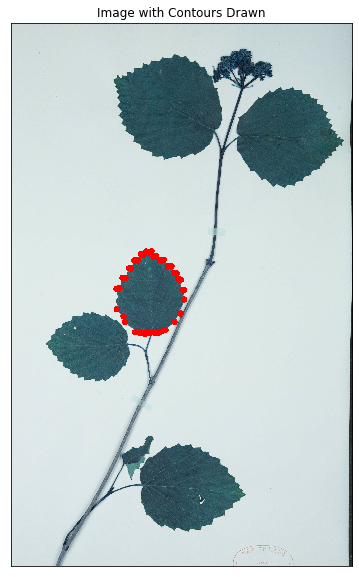

In [90]:
# 1st Derivative Thresholding
nonlob3c4 = nonlob3.copy()

for i in range(0, len(ap_opts_nc3l3_d1)):
    cv2.circle(nonlob3c4, (ap_opts_nc3l3_d1[i, 0], ap_opts_nc3l3_d1[i, 1]), 25, (255, 0, 0), -1)

plot(nonlob3c4, "Image with Contours Drawn", 10)    

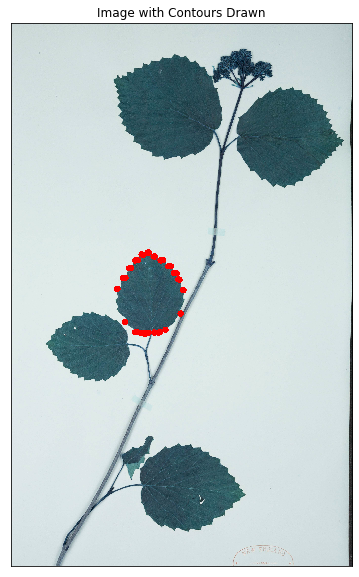

In [91]:
# 1st and 2nd Derivative Thresholding
nonlob3c4 = nonlob3.copy()

for i in range(0, len(ap_opts_nc3l3_d2)):
    cv2.circle(nonlob3c4, (ap_opts_nc3l3_d2[i, 0], ap_opts_nc3l3_d2[i, 1]), 25, (255, 0, 0), -1)

plot(nonlob3c4, "Image with Contours Drawn", 10)    

## Toothiness: Quadratic Fitting

In [92]:
# Parametrize the equations: A * x = b
A_closed = np.array([[0, 0, 1],
             [.25, .5, 1],
             [1, 1, 1]])

A = np.array([[2, -4, 2],
             [-3, 4, 1],
             [1, 0, 0]])

In [93]:
signage = np.zeros([len(a_nc3l3), 2]) # holds all signage when solving for x
peaks = np.zeros([len(a_nc3l3), 1]) # holds places where the 2nd derivative for x and y is both positive or both negative
lim = 0.00001
# 0.0001

for i in range(0, len(a_nc3l3)):
    if(i < (len(a_nc3l3)-1)):
        b = np.array([a_nc3l3[i-1],
                 a_nc3l3[i],
                 a_nc3l3[i+1],])
    else:
        b = np.array([a_nc3l3[i-1],
                 a_nc3l3[i],
                 a_nc3l3[0],])
        
    z = np.linalg.solve(A_closed, b)
    zz = np.matmul(A, b)
    
    signage[i] = (zz[0, 0], zz[0, 1])
    
    # where 2nd derivative of x and y is positive
    if(zz[0, 0] > lim and zz[0, 1] > lim):
        peaks[i] = 1
    # where 2nd derivative of x and y is negative
    elif(zz[0, 0] < lim and zz[0, 1] < lim):
        peaks[i] = -1

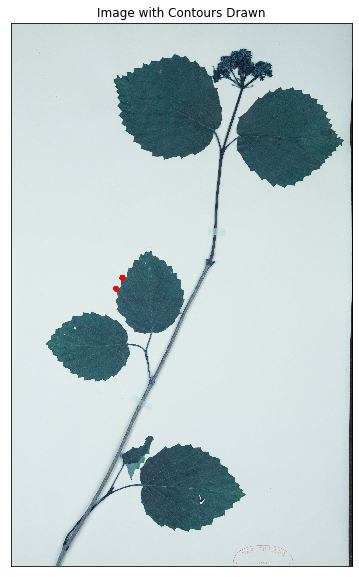

In [94]:
# QUADRATIC FIT: With only positive for 2nd derivative of x and y
nonlob3c4 = nonlob3.copy()

for i in range(0, len(a_nc3l3)):
    if(peaks[i] == 1):
        cv2.circle(nonlob3c4, (a_nc3l3[i, 0], a_nc3l3[i, 1]), 25, (255, 0, 0), -1)

plot(nonlob3c4, "Image with Contours Drawn", 10)    

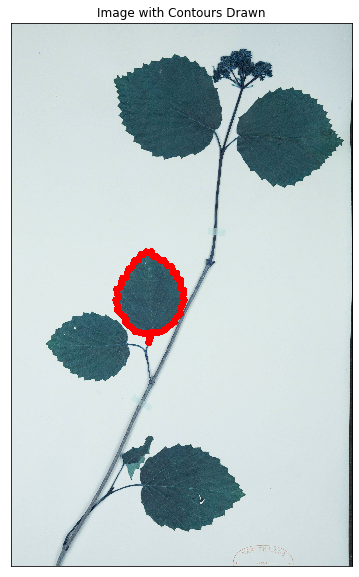

In [95]:
# QUADRATIC FIT: With only negative for 2nd derivative of x and y
nonlob3c4 = nonlob3.copy()

for i in range(0, len(a_nc3l3)):
    if(peaks[i] == -1):
        cv2.circle(nonlob3c4, (a_nc3l3[i, 0], a_nc3l3[i, 1]), 25, (255, 0, 0), -1)

plot(nonlob3c4, "Image with Contours Drawn", 10)    

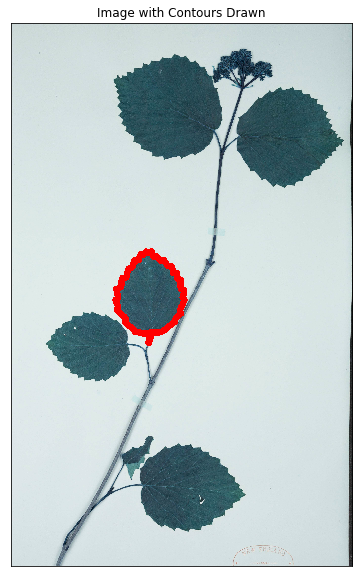

In [96]:
# QUADRATIC FIT: Both positive and negative for 2nd derivative of x and y
nonlob3c4 = nonlob3.copy()

for i in range(0, len(a_nc3l3)):
    if(peaks[i] == 1 or peaks[i] == -1):
        cv2.circle(nonlob3c4, (a_nc3l3[i, 0], a_nc3l3[i, 1]), 25, (255, 0, 0), -1)

plot(nonlob3c4, "Image with Contours Drawn", 10)    

## Toothiness: [0, 1] Dot Product

In [97]:
def norm_vector(pt1, pt2):
    dx = pt2[0] - pt1[0]
    dy = pt2[1] - pt1[1]
#     n1 = [-dy, dx]
#     n2 = [dy, -dx]
    x = [-dy, dy]
    y = [dx, -dx]
    return x, y

In [98]:
# QUADRATIC FIT
norm_vectors = []

# take 1st derivative
diff_nc3l3 = np.gradient(a_nc3l3[:, 1], a_nc3l3[:, 0])
ind_nc3l3 = np.where(diff_nc3l3 == 0)

# Find the normal vectors for every point within contours
for i in range(0, len(a_nc3l3)):
    if(i != (len(a_nc3l3)-1)):
        norm_vectors.append(norm_vector(a_nc3l3[i], a_nc3l3[i+1]))
    else:
        norm_vectors.append(norm_vector(a_nc3l3[i], a_nc3l3[0]))

In [99]:
def dot(x, y):
    """Dot product as sum of list comprehension doing element-wise multiplication"""
    return sum(x_i*y_i for x_i, y_i in zip(x, y))

In [100]:
norm_arr = np.array(norm_vectors)

# x coord, y coord -> (0, 0) and (0, 1)
b = np.array([[0, 0], [0, 1]])

# holds orientation 
o = []

for i in range(0, len(norm_arr)):
    o.append(sum(dot(norm_arr[i], b)))

In [101]:
of = np.array(o)

In [102]:
# take 1st derivative
lim = .01
diff_nc3l3 = np.gradient(a_nc3l3[:, 1], a_nc3l3[:, 0])
ind_nc3l3 = np.where(diff_nc3l3 == 0)
ind1_nc3l3 = np.where(np.absolute(diff_nc3l3) < lim)

# take 2nd derivative
diff2_nc3l3 = np.gradient(diff_nc3l3, a_nc3l3[:, 0])
diff2_nc3l3 = diff2_nc3l3*of # adjust with the actual orientation
ind2_nc3l3 = np.where(np.absolute(diff2_nc3l3) < lim) or np.where(np.absolute(diff2_nc3l3) > lim)

indf_nc3l3 = np.intersect1d(ind1_nc3l3, ind2_nc3l3)
ap_opts_nc3l3 = a_nc3l3[indf_nc3l3, :]
ap_opts_nc3l3_nc = a_nc3l3[ind_nc3l3, :]

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


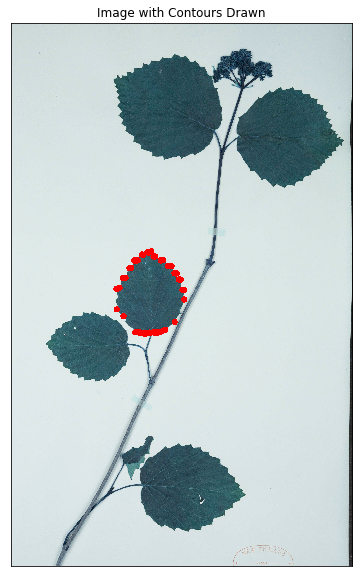

In [103]:
nonlob3c4 = nonlob3.copy()

for i in range(0, len(ap_opts_nc3l3)):
    cv2.circle(nonlob3c4, (ap_opts_nc3l3[i, 0], ap_opts_nc3l3[i, 1]), 25, (255, 0, 0), -1)

plot(nonlob3c4, "Image with Contours Drawn", 10)    

# Toothiness: Fourier Transforms

In [104]:
from scipy.signal import butter, filtfilt, welch

def butter_lowpass_filter(data, cutoff, nyq, order):
    normal_cutoff = cutoff / nyq
    print(normal_cutoff)
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='highpass', analog = False)
    y = filtfilt(b, a, data)
    return y

# Filter requirements.
# T = Sample Period
# fs = 1 /         # sample rate, Hz
# cutoff = 20      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
# nyq = 0.5 * fs   # Nyquist Frequency
# order = 2        # sin wave can be approx represented as quadratic
# n = int(T * fs)  # total number of samples

In [105]:
def tooth_fft(contour, xmin, xmax):
    # Step 1: Find the leaf's center of mass (COM)
    M = cv2.moments(contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    # Step 2: Calculate the distances from COM
    # Choose a random point to unravel the contours
    row_num = len(contour)
    a_nc = np.reshape(np.ravel(contour), (row_num, 2))
    a_nc = np.concatenate((a_nc[100:, :], a_nc[:100, :])) 
    
    # Calculate the distances between all points from COM
    com = np.full((row_num, 2), (cX, cY))
    d_nc = np.sqrt(((a_nc - com)**2).sum(1))
    
    # Step 3: Plot to determine where cutoff should be
    n_nc = len(d_nc)
    T_nc = 1.0 / n_nc

    yf_nc = fft(d_nc)
    xf_nc = np.linspace(0, 1./(2.*T_nc), n_nc / 2)

    plt.plot(xf_nc, np.abs(yf_nc[:int(n_nc/2)]) * (2 / n_nc))
    plt.xlim([xmin, xmax])
    plt.title("Original FFT: Determine Cutoff")
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    
    # returns distances calculated from COM to contours, fft x-axis, fft y-axis (calculated from COM to contours), n (number of points)
    return d_nc, xf_nc, yf_nc, n_nc
    
def butterworth(contour, d_nc, xf_nc, n_nc, cutoff, order, xmin, xmax):
    # Step 4: Filter and plot
    T = 1.0         # Sample Period
    fs_nc = n_nc / T # sample rate, Hz
    cutoff = cutoff  
    nyq = 0.5 * fs_nc
    order = order       

    dnc_filter = butter_lowpass_filter(d_nc, cutoff, nyq, order)
    
    # Plot filtered distances
    yf_fnc = fft(dnc_filter)
    
    # want to see the first half of fft - last value will be highest possibly freq (what the nyq freq) - # of samples in a period / 2
    plt.plot(xf_nc, np.abs(yf_fnc[:int(n_nc/2)]) * (2 / n_nc)) 
    plt.title("Butterworth Filter")
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim([xmin, xmax])
    
    # returns sample rate, butterworth filtered distances, fft of butterworth filtered distances
    return fs_nc, dnc_filter, yf_fnc

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


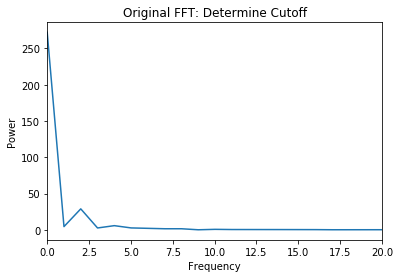

In [106]:
# Non-toothed
d_nc4, xf_nc4, yf_nc4, n_nc4 = tooth_fft(nc4_3[0], 0, 20) 

0.011990407673860911


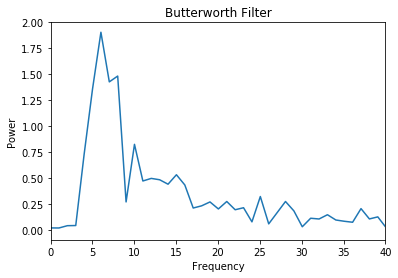

In [107]:
# butterworth(contour, d_nc, cutoff, order, xmin, xmax):
fs_nc4, dnc4_filter, yf_fnc4 = butterworth(nc4_3[0], d_nc4, xf_nc4, n_nc4, 5, 4, 0, 40)

In [108]:
# Step 6: Conduct Welch test
xfs_nc4, yfs_nc4 = welch(dnc4_filter, fs_nc4)

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


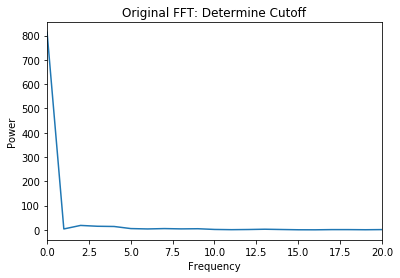

In [109]:
# Toothed
d_nc3, xf_nc3, yf_nc3, n_nc3 = tooth_fft(nc3_1[0], 0, 20)

0.003475842891901286


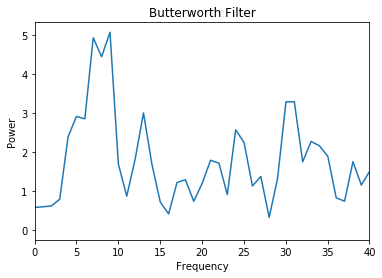

In [110]:
# butterworth(contour, d_nc, cutoff, order, xmin, xmax):
fs_nc3, dnc3_filter, yf_fnc3 = butterworth(nc3_1[0], d_nc3, xf_nc3, n_nc3, 5, 4, 0, 40)

In [111]:
# Step 6: Conduct Welch test
xfs_nc3, yfs_nc3 = welch(dnc3_filter, fs_nc3)

Text(0, 0.5, 'Power')

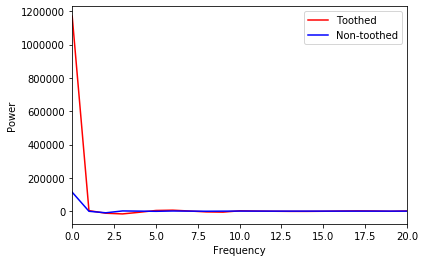

In [112]:
# Example - Toothed and Nontoothed Plotted Together: Non-Fourier Transformed
plt.plot(xf_nc3, yf_nc3[:int(n_nc3/2)], "red", label = "Toothed")
plt.plot(xf_nc4, yf_nc4[:int(n_nc4/2)], "blue", label = "Non-toothed")
plt.xlim([0, 20])
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Power")

Text(0, 0.5, 'Power')

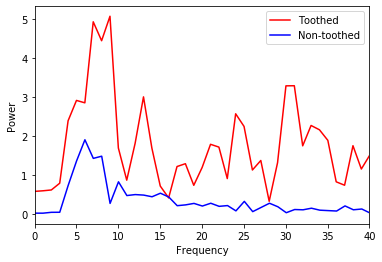

In [113]:
# Example - Toothed and Nontoothed Plotted Together: Fourier Transformed
plt.plot(xf_nc3, np.abs(yf_fnc3[:int(n_nc3/2)]) * (2 / n_nc3), "red", label = "Toothed") # to normalize
plt.plot(xf_nc4, np.abs(yf_fnc4[:int(n_nc4/2)]) * (2 / n_nc4), "blue", label = "Non-toothed") # to normalize

plt.xlim([0, 40])
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Power")

In [114]:
######################################################### TOOTHED 2 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


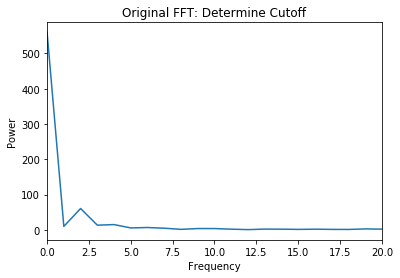

In [115]:
d_nc5, xf_nc5, yf_nc5, n_nc5 = tooth_fft(nc5_5[0], 0, 20)

0.005405405405405406


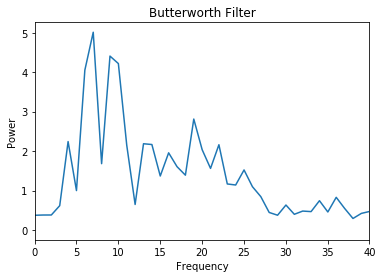

In [116]:
# butterworth(contour, d_nc, cutoff, order, xmin, xmax):
fs_nc5, dnc5_filter, yf_fnc5 = butterworth(nc5_5[0], d_nc5, xf_nc5, n_nc5, 5, 4, 0, 40)

In [117]:
# Step 6: Conduct Welch test
xfs_nc5, yfs_nc5 = welch(dnc5_filter, fs_nc5)

In [118]:
######################################################### TOOTHED 3 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


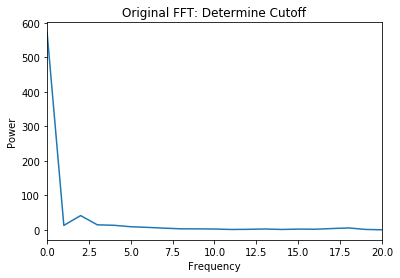

In [119]:
d_nc6, xf_nc6, yf_nc6, n_nc6 = tooth_fft(nc6_3[0], 0, 20)

0.00482392667631452


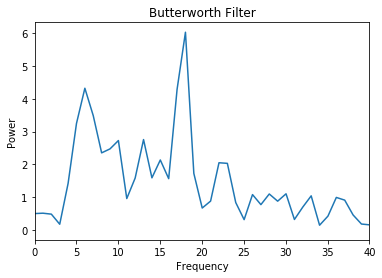

In [120]:
fs_nc6, dnc6_filter, yf_fnc6 = butterworth(nc6_3[0], d_nc6, xf_nc6, n_nc6, 5, 4, 0, 40)

In [121]:
# Step 6: Conduct Welch test
xfs_nc6, yfs_nc6 = welch(dnc6_filter, fs_nc6)

In [122]:
############################################################ TOOTHED 4 #########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


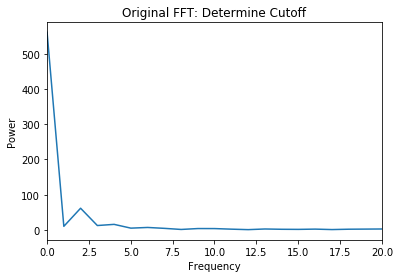

In [123]:
d_nc8, xf_nc8, yf_nc8, n_nc8 = tooth_fft(nc8_4[0], 0, 20)

0.005399568034557235


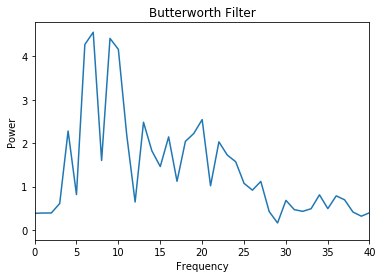

In [124]:
fs_nc8, dnc8_filter, yf_fnc8 = butterworth(nc8_4[0], d_nc8, xf_nc8, n_nc8, 5, 4, 0, 40)

In [125]:
# Step 6: Conduct Welch test
xfs_nc8, yfs_nc8 = welch(dnc8_filter, fs_nc8)

In [126]:
######################################################### TOOTHED 5 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


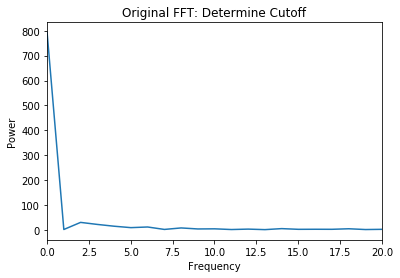

In [127]:
d_nc9, xf_nc9, yf_nc9, n_nc9 = tooth_fft(nc9_2[0], 0, 20)

0.003683241252302026


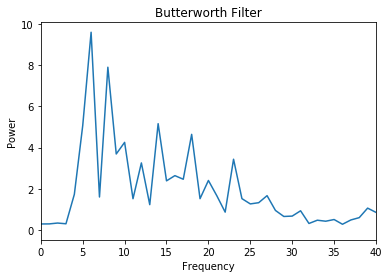

In [128]:
fs_nc9, dnc9_filter, yf_fnc9 = butterworth(nc9_2[0], d_nc9, xf_nc9, n_nc9, 5, 4, 0, 40)

In [79]:
# Step 6: Conduct Welch test
xfs_nc9, yfs_nc9 = welch(dnc9_filter, fs_nc9)

In [80]:
######################################################### TOOTHED 6 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


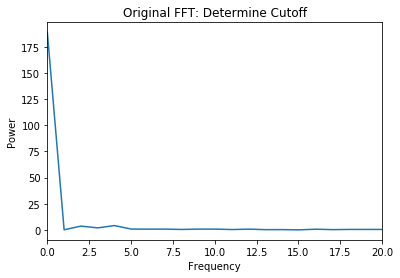

In [132]:
d_nc11, xf_nc11, yf_nc11, n_nc11 = tooth_fft(nc11_1[0], 0, 20)

0.01524390243902439


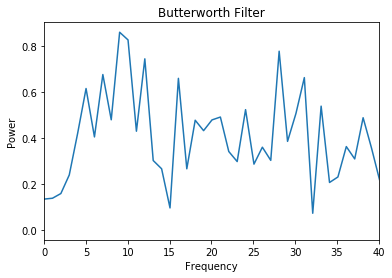

In [133]:
fs_nc11, dnc11_filter, yf_fnc11 = butterworth(nc11_1[0], d_nc11, xf_nc11, n_nc11, 5, 4, 0, 40)

In [134]:
# Step 6: Conduct Welch test
xfs_nc11, yfs_nc11 = welch(dnc11_filter, fs_nc11)

In [135]:
######################################################### TOOTHED 7 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


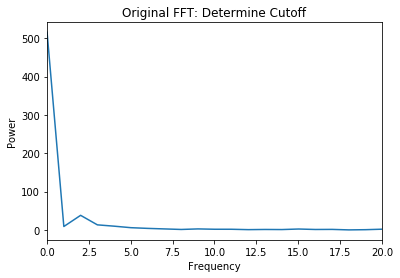

In [136]:
d_nc12, xf_nc12, yf_nc12, n_nc12 = tooth_fft(nc12_2[0], 0, 20)

0.005194805194805195


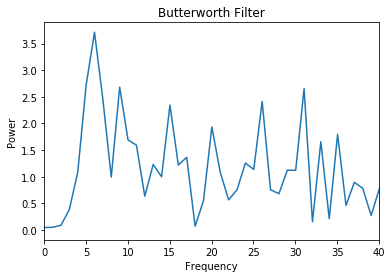

In [137]:
fs_nc12, dnc12_filter, yf_fnc12 = butterworth(nc12_2[0], d_nc12, xf_nc12, n_nc12, 5, 4, 0, 40)

In [138]:
# Step 6: Conduct Welch test
xfs_nc12, yfs_nc12 = welch(dnc12_filter, fs_nc12)

In [139]:
######################################################### TOOTHED 8 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


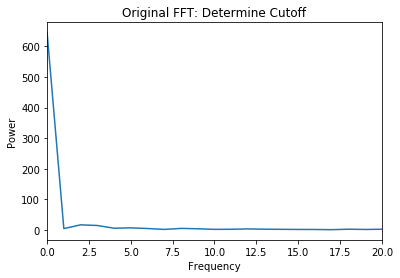

In [140]:
d_nc14, xf_nc14, yf_nc14, n_nc14 = tooth_fft(nc14_1[0], 0, 20)

0.003988831272437176


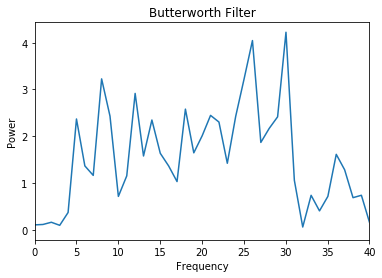

In [141]:
fs_nc14, dnc14_filter, yf_fnc14 = butterworth(nc14_1[0], d_nc14, xf_nc14, n_nc14, 5, 4, 0, 40)

In [142]:
# Step 6: Conduct Welch test
xfs_nc14, yfs_nc14 = welch(dnc14_filter, fs_nc14)

In [143]:
######################################################### TOOTHED 9 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


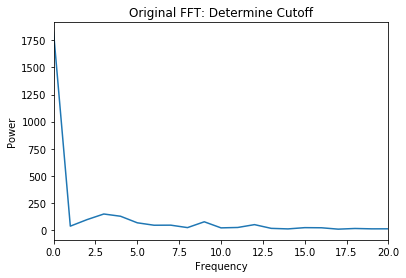

In [144]:
d_lc2, xf_lc2, yf_lc2, n_lc2 = tooth_fft(lc2_1[0], 0, 20)

0.0010622477161674102


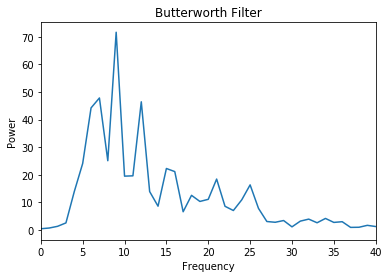

In [145]:
fs_lc2, dlc2_filter, yf_flc2 = butterworth(lc2_1[0], d_lc2, xf_lc2, n_lc2, 5, 4, 0, 40)

In [146]:
# Step 6: Conduct Welch test
xfs_lc2, yfs_lc2 = welch(dlc2_filter, fs_lc2)

In [147]:
######################################################### TOOTHED 10 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


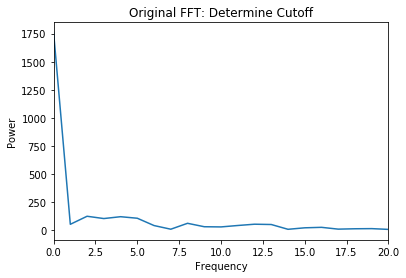

In [148]:
d_lc3, xf_lc3, yf_lc3, n_lc3 = tooth_fft(lc3_2[0], 0, 20)

0.0010509721492380452


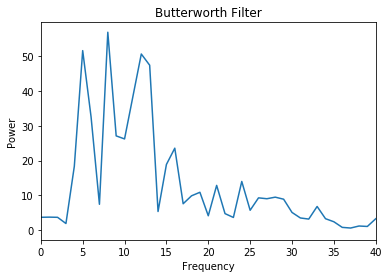

In [149]:
fs_lc3, dlc3_filter, yf_flc3 = butterworth(lc3_2[0], d_lc3, xf_lc3, n_lc3, 5, 4, 0, 40)

In [150]:
# Step 6: Conduct Welch test
xfs_lc3, yfs_lc3 = welch(dlc3_filter, fs_lc3)

In [151]:
######################################################### TOOTHED 11 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


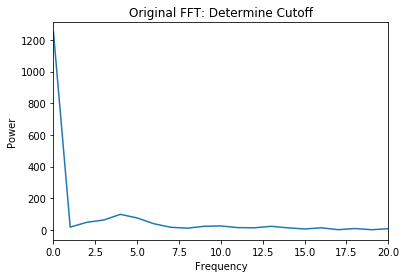

In [152]:
d_lc4, xf_lc4, yf_lc4, n_lc4 = tooth_fft(lc4_2[0], 0, 20)

0.0015583606046439145


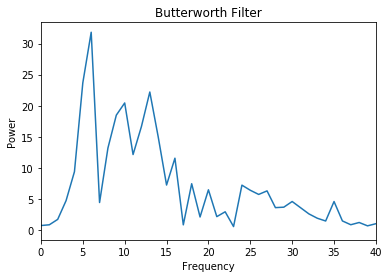

In [153]:
fs_lc4, dlc4_filter, yf_flc4 = butterworth(lc4_2[0], d_lc4, xf_lc4, n_lc4, 5, 4, 0, 40)

In [154]:
# Step 6: Conduct Welch test
xfs_lc4, yfs_lc4 = welch(dlc4_filter, fs_lc4)

In [155]:
######################################################### TOOTHED 12 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


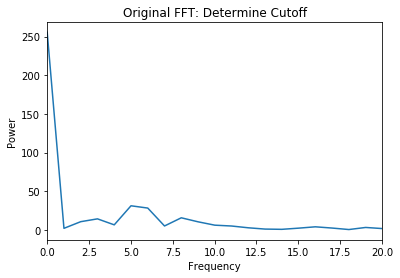

In [156]:
d_lc5, xf_lc5, yf_lc5, n_lc5 = tooth_fft(lc5_1[0], 0, 20)

0.005924170616113744


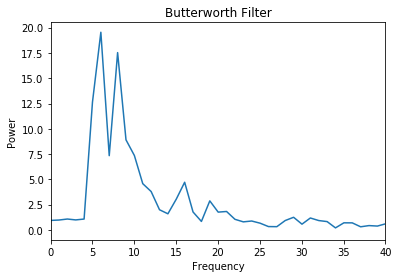

In [157]:
fs_lc5, dlc5_filter, yf_flc5 = butterworth(lc5_1[0], d_lc5, xf_lc5, n_lc5, 5, 4, 0, 40)

In [158]:
# Step 6: Conduct Welch test
xfs_lc5, yfs_lc5 = welch(dlc5_filter, fs_lc5)

In [159]:
######################################################### TOOTHED 13 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


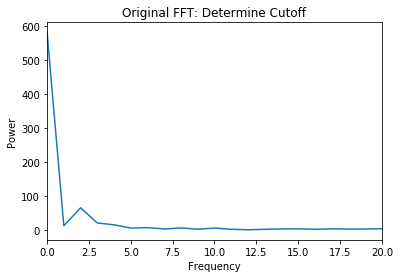

In [160]:
d_nc15, xf_nc15, yf_nc15, n_nc15 = tooth_fft(nc15_2[0], 0, 20)

0.005


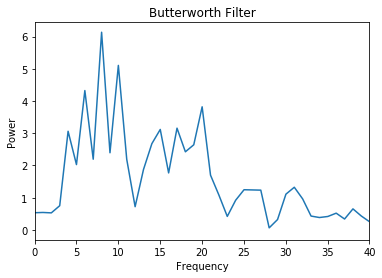

In [161]:
fs_nc15, dnc15_filter, yf_fnc15 = butterworth(nc15_2[0], d_nc15, xf_nc15, n_nc15, 5, 4, 0, 40)

In [162]:
# Step 6: Conduct Welch test
xfs_nc15, yfs_nc15 = welch(dnc15_filter, fs_nc15)

In [163]:
######################################################### TOOTHED 14 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


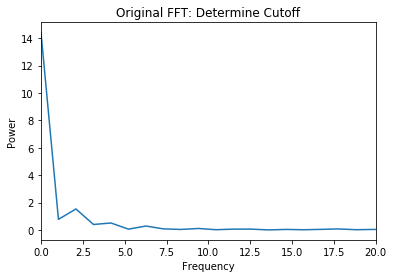

In [164]:
d_nc16, xf_nc16, yf_nc16, n_nc16 = tooth_fft(nc16_1[0], 0, 20)

0.21739130434782608


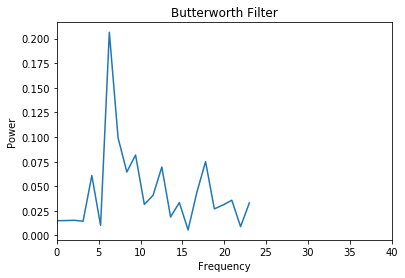

In [165]:
fs_nc16, dnc16_filter, yf_fnc16 = butterworth(nc16_1[0], d_nc16, xf_nc16, n_nc16, 5, 4, 0, 40)

In [166]:
# Step 6: Conduct Welch test
xfs_nc16, yfs_nc16 = welch(dnc16_filter, fs_nc16)

C:\Users\anna5\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))


In [167]:
######################################################### TOOTHED 15 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


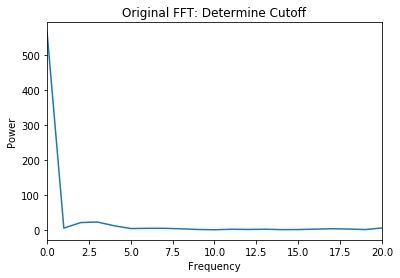

In [168]:
d_nc17, xf_nc17, yf_nc17, n_nc17 = tooth_fft(nc17_2[0], 0, 20)

0.00477326968973747


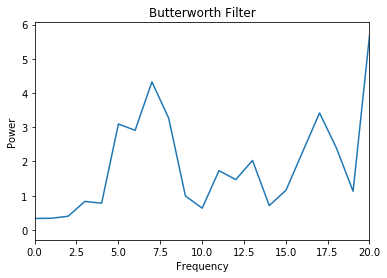

In [169]:
fs_nc17, dnc17_filter, yf_fnc17 = butterworth(nc17_2[0], d_nc17, xf_nc17, n_nc17, 5, 4, 0, 20)

In [170]:
# Step 6: Conduct Welch test
xfs_nc17, yfs_nc17 = welch(dnc17_filter, fs_nc17)

In [171]:
######################################################### TOOTHED 16 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


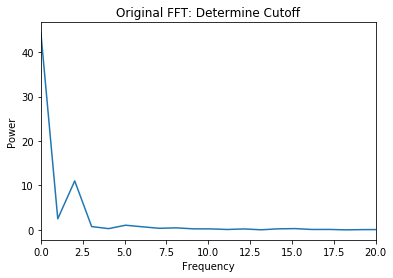

In [172]:
d_nc18, xf_nc18, yf_nc18, n_nc18 = tooth_fft(nc18_4[0], 0, 20)

0.060240963855421686


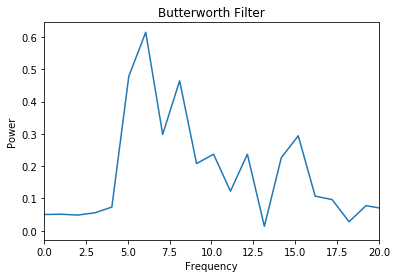

In [173]:
fs_nc18, dnc18_filter, yf_fnc18 = butterworth(nc18_4[0], d_nc18, xf_nc18, n_nc18, 5, 4, 0, 20)

In [177]:
# Step 6: Conduct Welch test
xfs_nc18, yfs_nc18 = welch(dnc18_filter, fs_nc18)

In [178]:
######################################################### TOOTHED 17 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


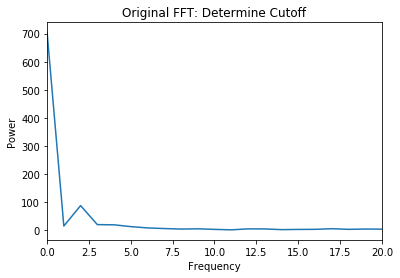

In [179]:
d_nc19, xf_nc19, yf_nc19, n_nc19 = tooth_fft(nc19_2[0], 0, 20)

0.003838771593090211


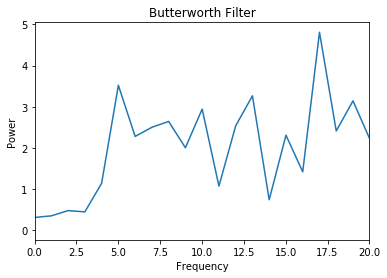

In [180]:
fs_nc19, dnc19_filter, yf_fnc19 = butterworth(nc19_2[0], d_nc19, xf_nc19, n_nc19, 5, 4, 0, 20)

In [183]:
# Step 6: Conduct Welch test
xfs_nc19, yfs_nc19 = welch(dnc19_filter, fs_nc19)

In [184]:
######################################################### TOOTHED 18 ###########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


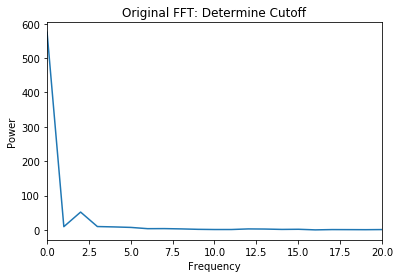

In [185]:
d_nc20, xf_nc20, yf_nc20, n_nc20 = tooth_fft(nc20_2[0], 0, 20)

0.004861448711716091


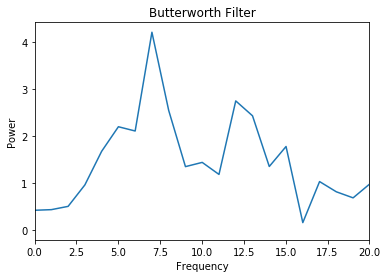

In [186]:
fs_nc20, dnc20_filter, yf_fnc20 = butterworth(nc20_2[0], d_nc20, xf_nc20, n_nc20, 5, 4, 0, 20)

In [187]:
# Step 6: Conduct Welch test
xfs_nc20, yfs_nc20 = welch(dnc20_filter, fs_nc20)

In [188]:
####################################################### NON-TOOTHED 2 #########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


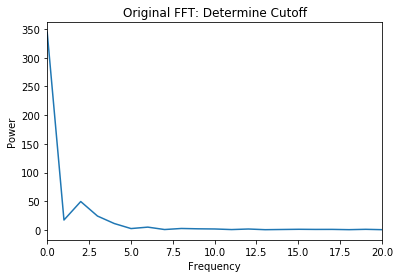

In [192]:
d_nt1, xf_nt1, yf_nt1, n_nt1 = tooth_fft(nc1_4[0], 0, 20)

0.008025682182985553


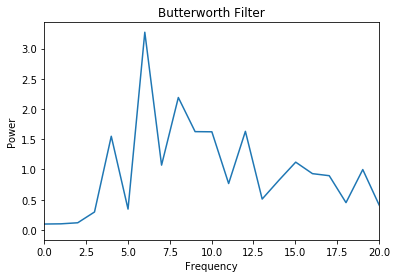

In [193]:
fs_nt1, dnt1_filter, yf_fnt1 = butterworth(nc1_4[0], d_nt1, xf_nt1, n_nt1, 5, 4, 0, 20)

In [194]:
# Step 6: Conduct Welch test
xfs_nt1, yfs_nt1 = welch(dnt1_filter, fs_nt1)

In [195]:
####################################################### NON-TOOTHED 3 #########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


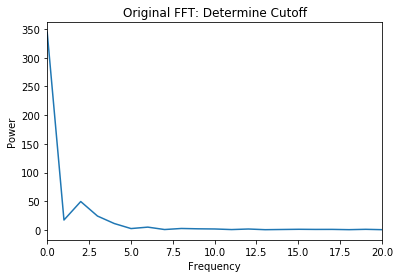

In [196]:
d_nt10, xf_nt10, yf_nt10, n_nt10 = tooth_fft(nc1_4[0], 0, 20)

0.008025682182985553


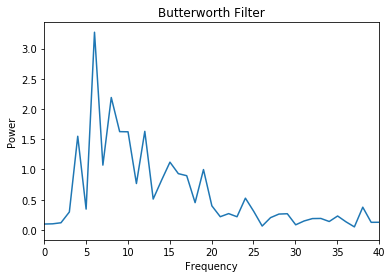

In [197]:
fs_nt10, dnt10_filter, yf_fnt10 = butterworth(nc1_4[0], d_nt10, xf_nt10, n_nt10, 5, 4, 0, 40)

In [198]:
# Step 6: Conduct Welch test
xfs_nt10, yfs_nt10 = welch(dnt10_filter, fs_nt10)

In [199]:
####################################################### NON-TOOTHED 4 #########################################################

C:\Users\anna5\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


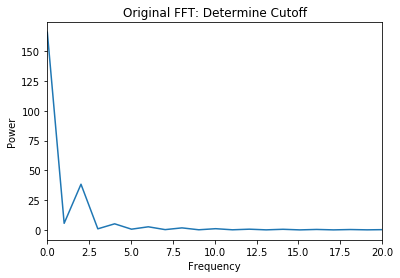

In [200]:
d_nt13, xf_nt13, yf_nt13, n_nt13 = tooth_fft(nc13_1[0], 0, 20)

0.018214936247723135


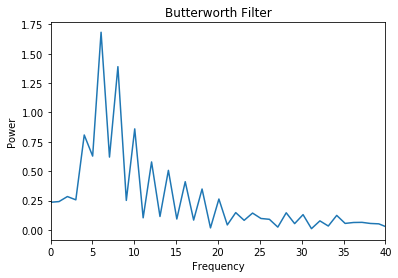

In [201]:
fs_nt13, dnt13_filter, yf_fnt13 = butterworth(nc13_1[0], d_nt13, xf_nt13, n_nt13, 5, 4, 0, 40)

In [202]:
# Step 6: Conduct Welch test
xfs_nt13, yfs_nt13 = welch(dnt13_filter, fs_nt13)

### Toothiness: Fourier Transform - Time Series Plot

Text(0, 0.5, 'Power')

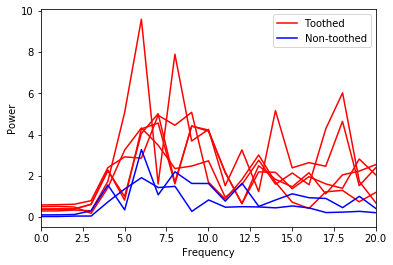

In [203]:
# Time Series Plot
plt.plot(xf_nc3, np.abs(yf_fnc3[:int(n_nc3/2)]) * (2 / n_nc3), "red", label = "Toothed")
plt.plot(xf_nc5, np.abs(yf_fnc5[:int(n_nc5/2)]) * (2 / n_nc5), "red") 
plt.plot(xf_nc6, np.abs(yf_fnc6[:int(n_nc6/2)]) * (2 / n_nc6), "red") 
plt.plot(xf_nc8, np.abs(yf_fnc8[:int(n_nc8/2)]) * (2 / n_nc8), "red") 
plt.plot(xf_nc9, np.abs(yf_fnc9[:int(n_nc9/2)]) * (2 / n_nc9), "red") 

# CHANGE
plt.plot(xf_nc4, np.abs(yf_fnc4[:int(n_nc4/2)]) * (2 / n_nc4), "blue", label = "Non-toothed") # to normalize
plt.plot(xf_nt1, np.abs(yf_fnt1[:int(n_nt1/2)]) * (2 / n_nt1), "blue") 

plt.xlim(0, 20)
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Power")

### Toothiness: Fourier Transform - Welch Method

Text(0, 0.5, 'Power')

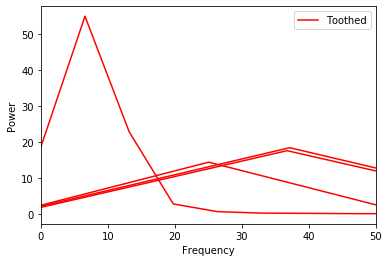

In [204]:
# Welch Method Plot - Lobed
plt.plot(xfs_lc2, yfs_lc2, "red", label = "Toothed")
plt.plot(xfs_lc3, yfs_lc3, "red")
plt.plot(xfs_lc4, yfs_lc4, "red")
plt.plot(xfs_lc5, yfs_lc5, "red")

plt.xlim(0, 50)
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Power")

Text(0, 0.5, 'Power')

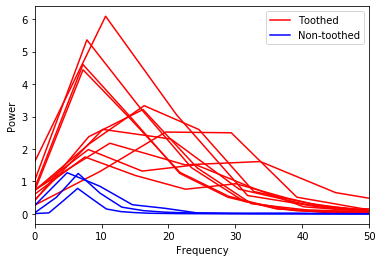

In [205]:
# Welch Test Plot - Non-lobed
plt.plot(xfs_nc3, yfs_nc3, "red", label = "Toothed")
plt.plot(xfs_nc5, yfs_nc5, "red")
plt.plot(xfs_nc6, yfs_nc6, "red")
plt.plot(xfs_nc8, yfs_nc8, "red")
plt.plot(xfs_nc9, yfs_nc9, "red")
# plt.plot(xfs_nc11, yfs_nc11, "orange") # not a lot of noise
plt.plot(xfs_nc12, yfs_nc12, "red")
plt.plot(xfs_nc14, yfs_nc14, "red")
plt.plot(xfs_nc15, yfs_nc15, "red")
# plt.plot(xfs_nc16, yfs_nc16, "green") # not a lot of noise - probably b/c not many points
plt.plot(xfs_nc17, yfs_nc17, "red")
# plt.plot(xfs_nc18, yfs_nc18, "green") # not a lot of noise - investigate why
plt.plot(xfs_nc19, yfs_nc19, "red")
plt.plot(xfs_nc20, yfs_nc20, "red")

# plt.plot(xfs_lc2, yfs_lc2, "orange", label = "Toothed (Lobed)")
# plt.plot(xfs_lc3, yfs_lc3, "orange")
# plt.plot(xfs_lc4, yfs_lc4, "orange")
# plt.plot(xfs_lc5, yfs_lc5, "orange")

plt.plot(xfs_nc4, yfs_nc4, "blue", label = "Non-toothed") # signal is noisy is b/c our method isn't perfect 
plt.plot(xfs_nt1, yfs_nt1, "blue")
# plt.plot(xfs_nt10, yfs_nt10, "green") # too much noise for a non-toothed
plt.plot(xfs_nt13, yfs_nt13, "blue")

plt.xlim(0, 50)
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Power")

NameError: name 'xfs_1' is not defined

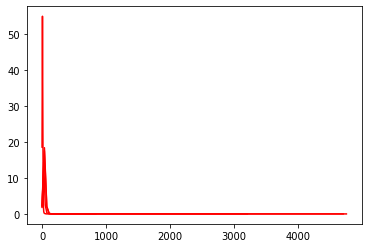

In [206]:
# Welch Test Plot
plt.plot(xfs_lc2, yfs_lc2, "red")
plt.plot(xfs_lc3, yfs_lc3, "red")
plt.plot(xfs_lc4, yfs_lc4, "red")
plt.plot(xfs_lc5, yfs_lc5, "red")

plt.plot(xf_nc4, yfs_1, "blue") # signal is noisy is b/c our method isn't perfect 
plt.plot(xfs_nt1, yfs_nt1, "blue")
plt.plot(xfs_nt13, yfs_nt13, "blue")
# plt.plot(xfs_nc11, yfs_nc11, "red")
# plt.plot(xfs_nc16, yfs_nc16, "red")
# plt.plot(xfs_nc18, yfs_nc18, "orange")
plt.xlim(0, 50)

In [ ]:
def calc_integral(w_x, w_y, lowerb, upperb):
    calc_dx = np.diff(w_x)[0]
    return np.trapz(w_y[(w_x > lowerb) & (w_x < upperb)], dx = calc_dx)

In [ ]:
welch_lx = [xfs_nc4, xfs_nt1, xfs_nt13]
welch_ly = [yfs_nc4, yfs_nt1, yfs_nt13]

In [ ]:
welch_nlx = [xfs_nc3, xfs_nc5, xfs_nc6, xfs_nc8, xfs_nc9, xfs_nc12, xfs_nc14, xfs_nc15, xfs_nc17, xfs_nc19, xfs_nc20]
welch_nly = [yfs_nc3, yfs_nc5, yfs_nc6, yfs_nc8, yfs_nc9, yfs_nc12, yfs_nc14, yfs_nc15, yfs_nc17, yfs_nc19, yfs_nc20]

In [ ]:
l_intval = []
nl_intval = []

for i in range(0, len(welch_ly)):
    l_intval.append(calc_integral(welch_lx[i], welch_ly[i], 15, 40))

for i in range(0, len(welch_nly)):
    nl_intval.append(calc_integral(welch_nlx[i], welch_nly[i], 15, 40))

In [ ]:
# Integral approximation for non-toothed
print(l_intval)
print(min(l_intval))
print(sum(l_intval) / len(l_intval))

In [ ]:
# Integral approximation for toothed
print(nl_intval)
print(min(nl_intval))
print(sum(nl_intval) / len(nl_intval))

In [ ]:
print(sum(nl_intval[0:4]) / len(nl_intval[0:4]))